In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [124]:
def euler(u_start, t_start, t_end, f, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    """
    u_prev = u_start
    u = [u_prev]
    
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        ui = f(u_prev) * t_delta + u_prev
        u_prev = ui
        
        u.append(ui)

    return steps, u[:-1]

In [125]:
def part2_problem1a(dt=1):
    x_start, x_end = (0, 4)
    a = 1
    
    x_euler, y_euler = euler(a, x_start, x_end, lambda u: u, dt)
    x_actual = np.linspace(x_start, x_end, 100)
    y_actual = np.exp(x_actual)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_euler, y_euler)
    ax.plot(x_actual, y_actual)

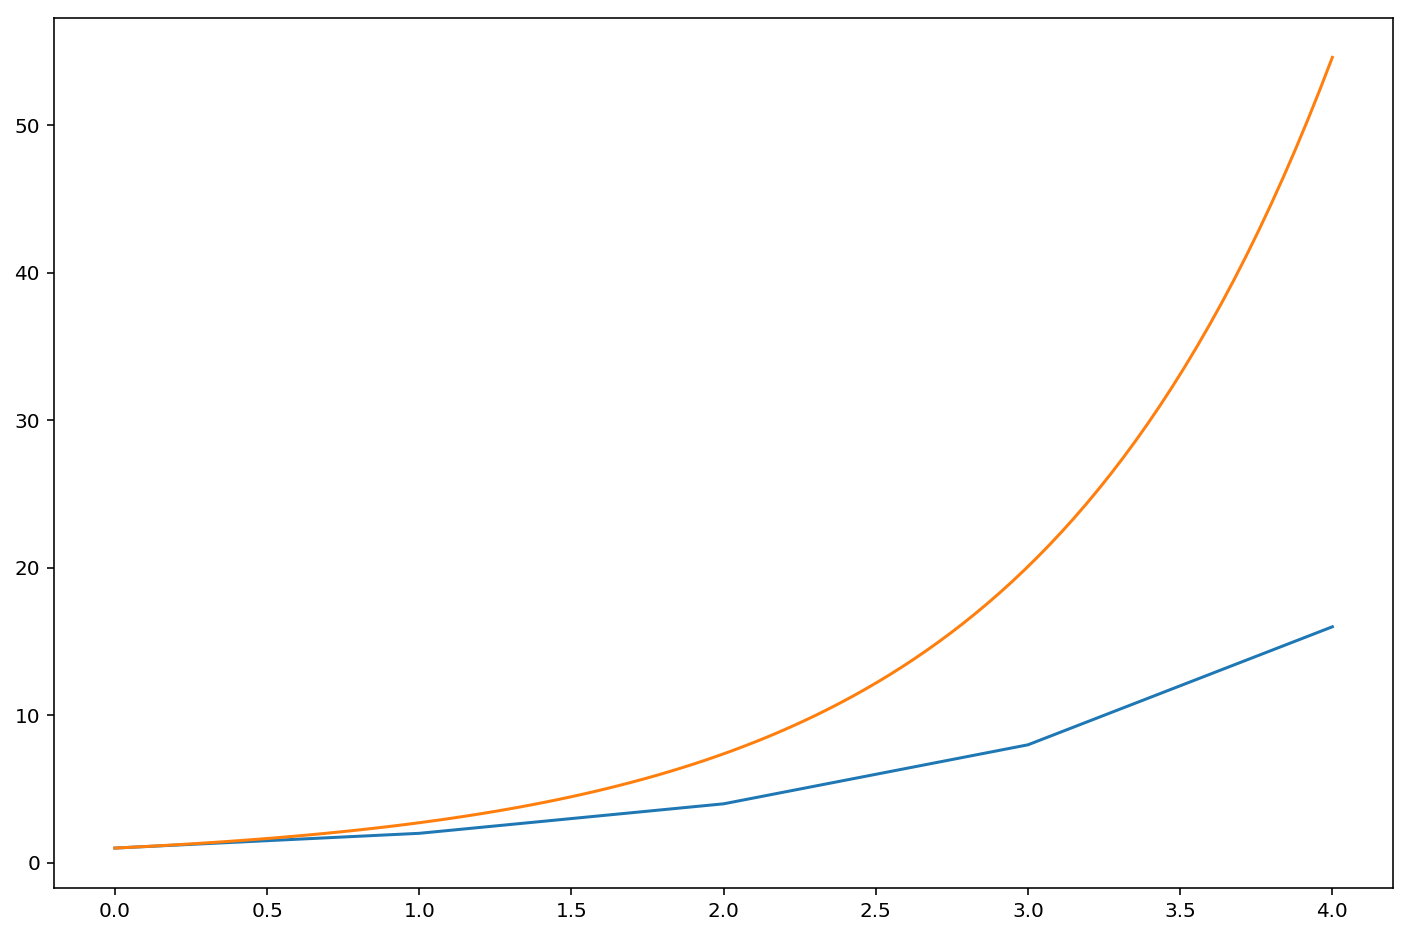

In [126]:
part2_problem1a()

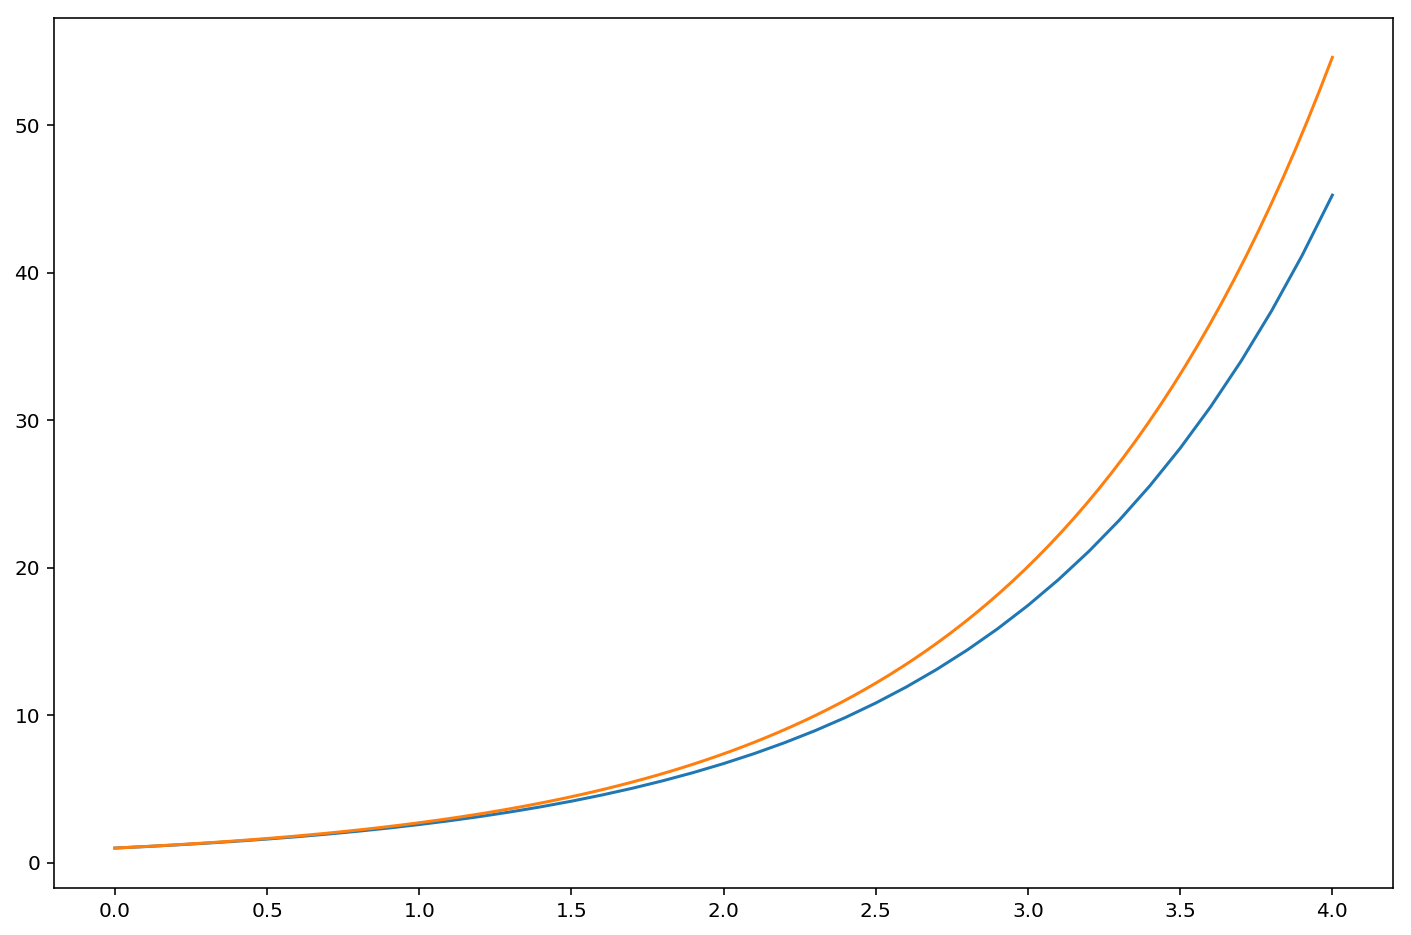

In [127]:
part2_problem1a(1/10)

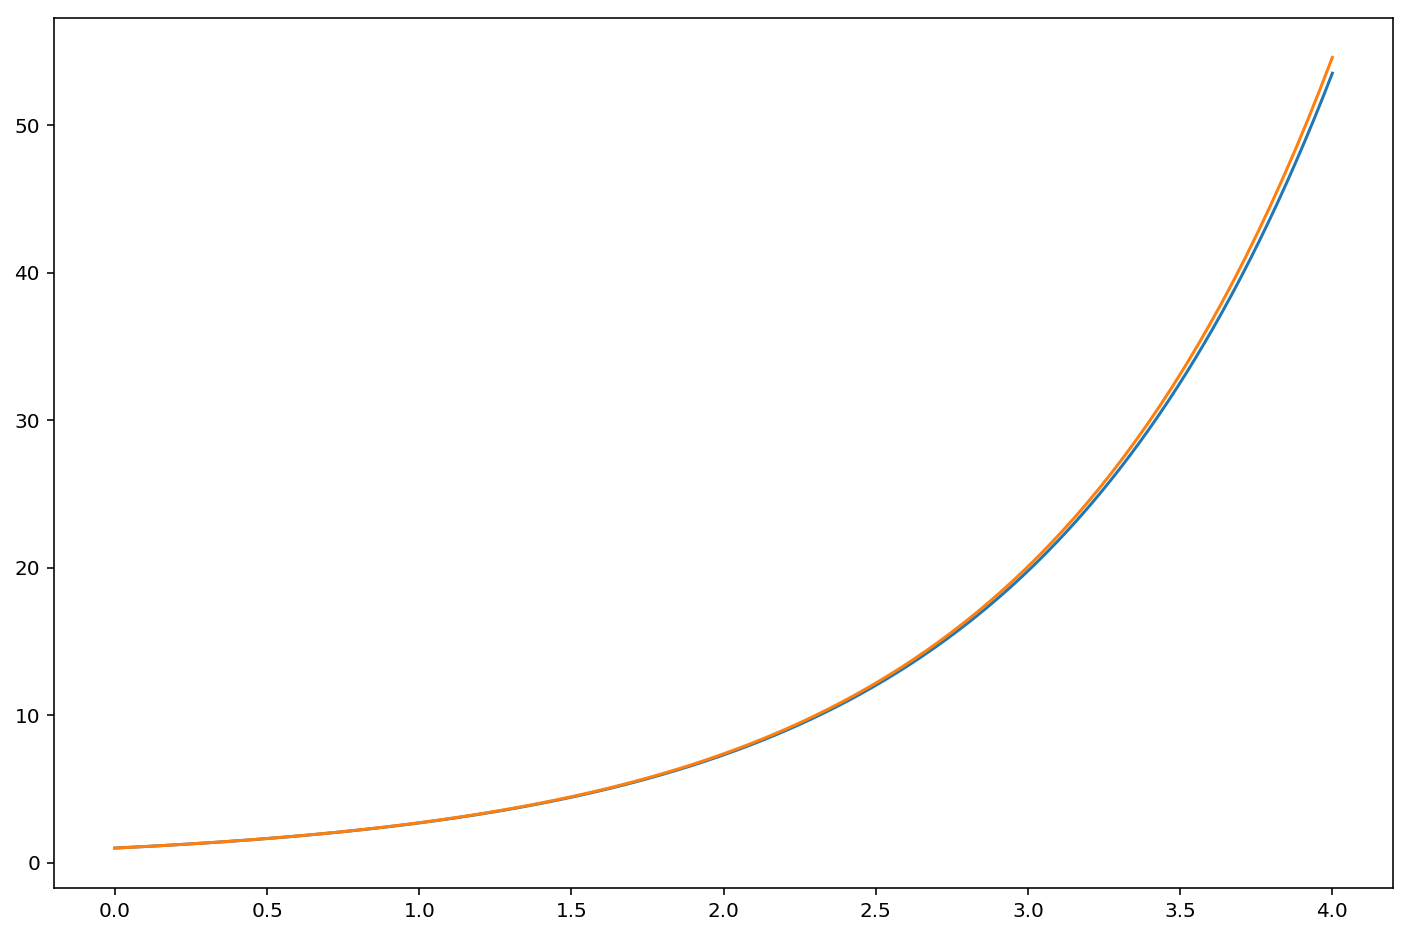

In [128]:
part2_problem1a(1/100)

In [129]:
def modified_euler(u_start, t_start, t_end, f, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    """
    u_prev = u_start
    u = [u_prev]
    
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        u_next_euler = (f(u_prev) * t_delta) + u_prev
        avg_slope = (f(u_next_euler) + f(u_prev)) / 2
        ui = (avg_slope * t_delta) + u_prev
        u_prev = ui
        
        u.append(ui)

    return steps, u[:-1]

In [132]:
def part2_problem1b(dt=1):
    x_start, x_end = (0, 4)
    a = 1
    
    x_euler, y_euler = modified_euler(a, x_start, x_end, lambda u: u, dt)
    x_actual = np.linspace(x_start, x_end, 100)
    y_actual = np.exp(x_actual)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_euler, y_euler)
    ax.plot(x_actual, y_actual)

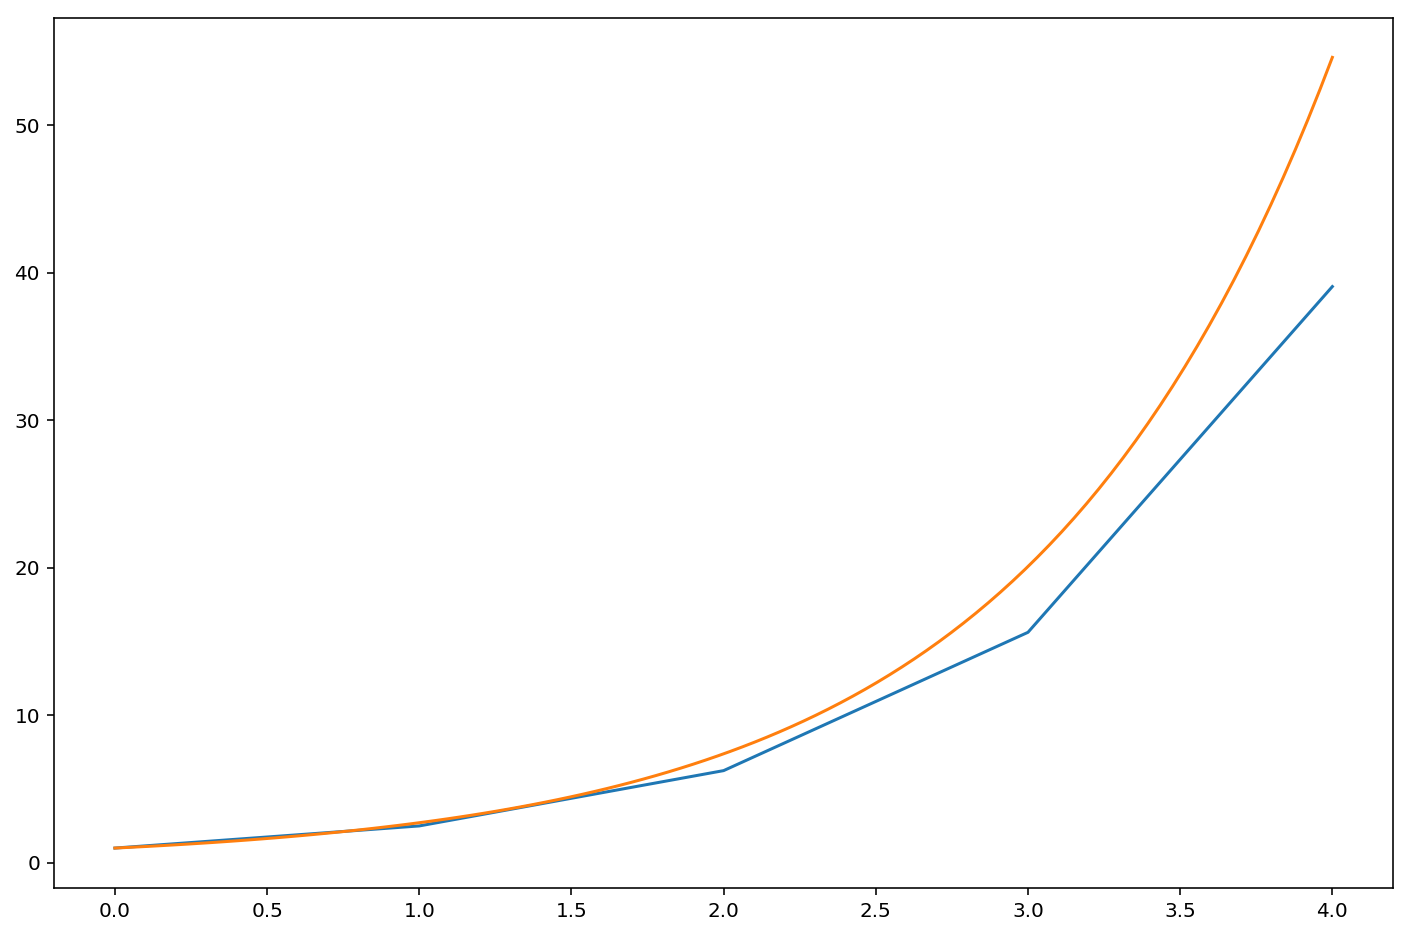

In [133]:
part2_problem1b(1)

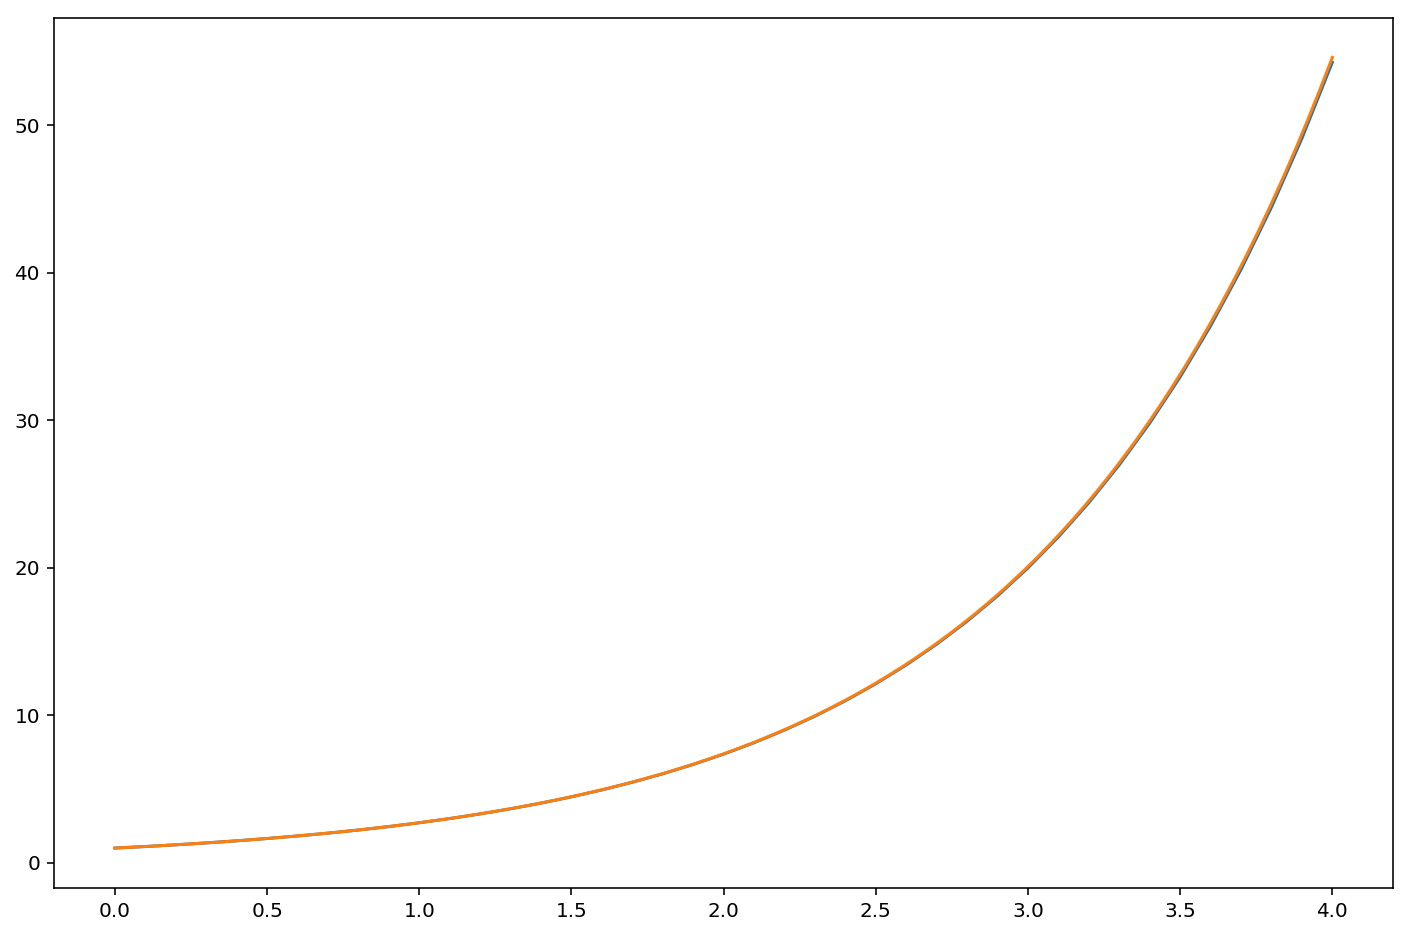

In [134]:
part2_problem1b(1/10)

In [168]:
def solve_taylor(u_start, t_start, t_end, f, f_deriv, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    
    ODE is basically using y value to get derivative
    """
    u_prev = u_start
    u = [u_prev]
    
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        taylor_1st = (t_delta * f(u_prev))
        taylor_2nd = (((t_delta ** 2) / 2) * f_deriv(u_prev) * f(u_prev))
        ui = u_prev + taylor_1st + taylor_2nd
        u_prev = ui
        
        u.append(ui)
        
    return steps, u[:-1]

In [169]:
def part2_problem2(dt=2):
    x_start, x_end = (0, 4)
    a = 1
    
    x_approx, y_approx = solve_taylor(a, x_start, x_end, 
                                      lambda u: 2 * np.sin(u),
                                      lambda u: 4 * np.cos(u) * np.sin(u),
                                      dt)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_approx, y_approx)

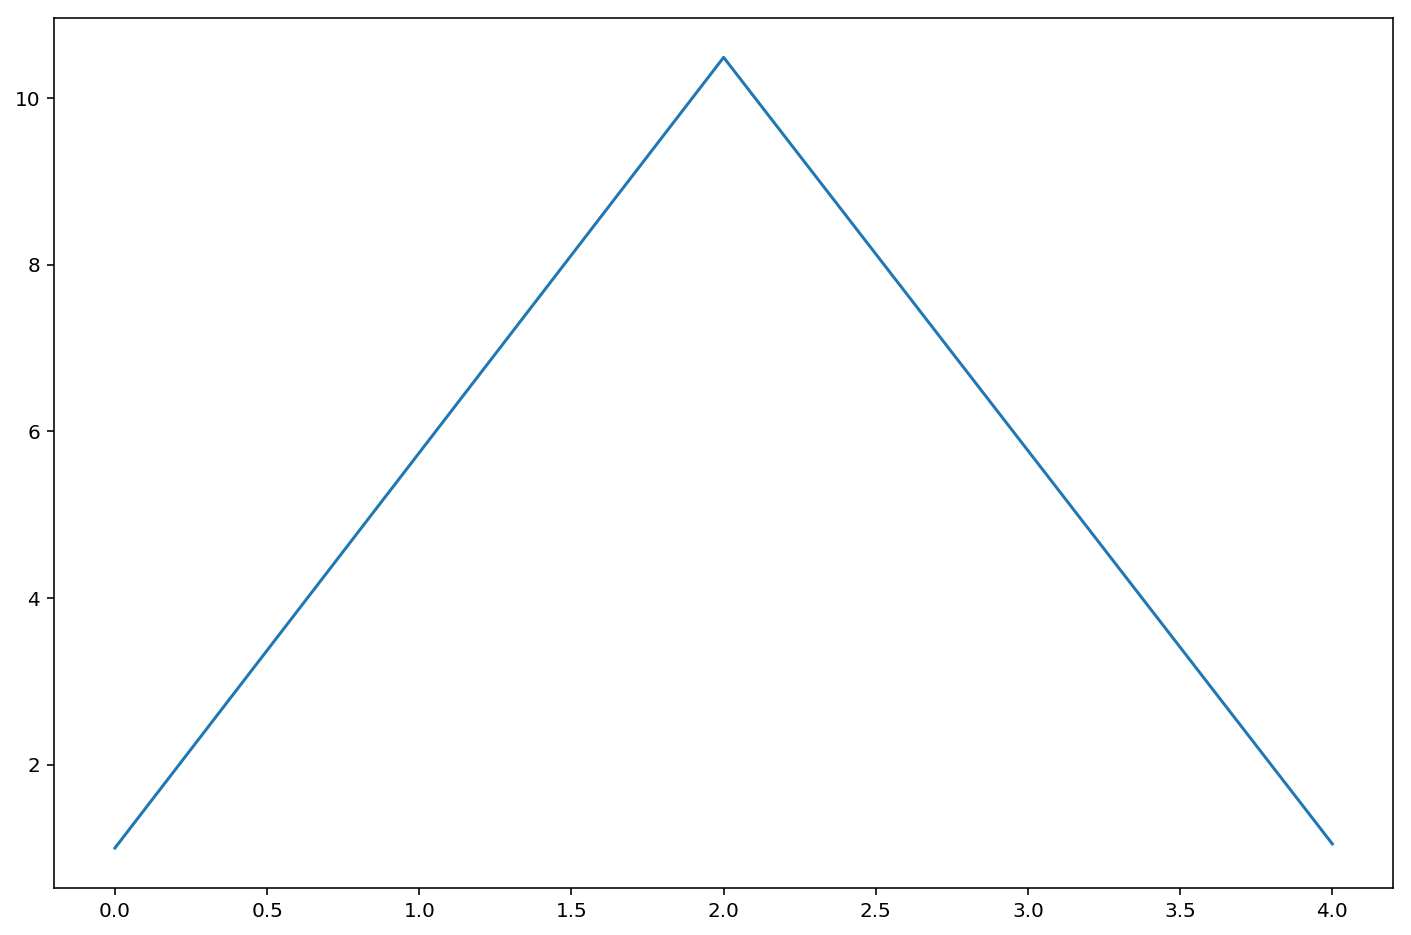

In [171]:
part2_problem2()

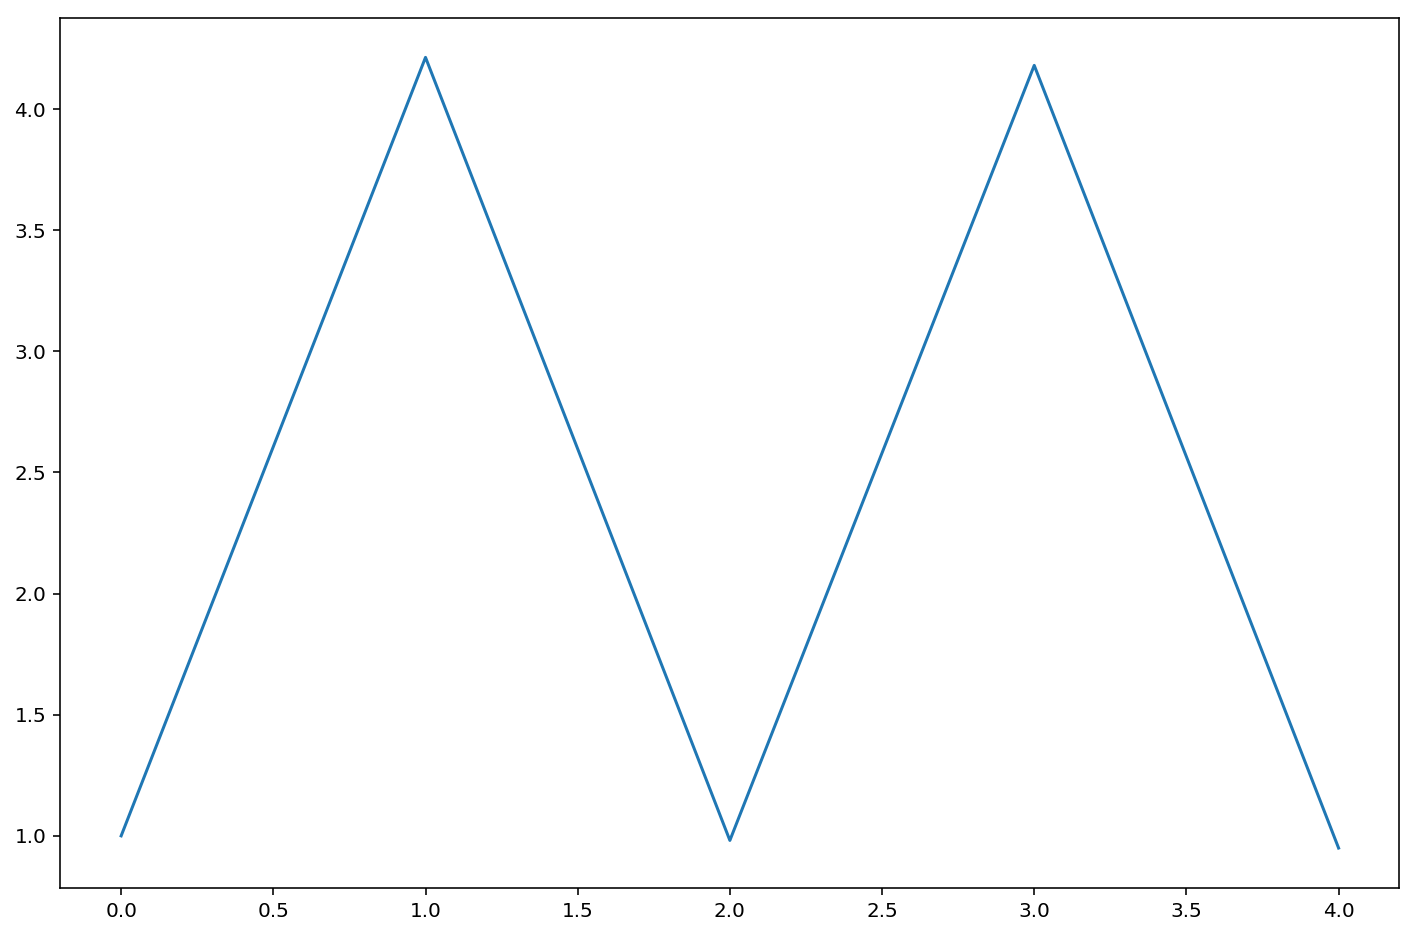

In [172]:
part2_problem2(1)

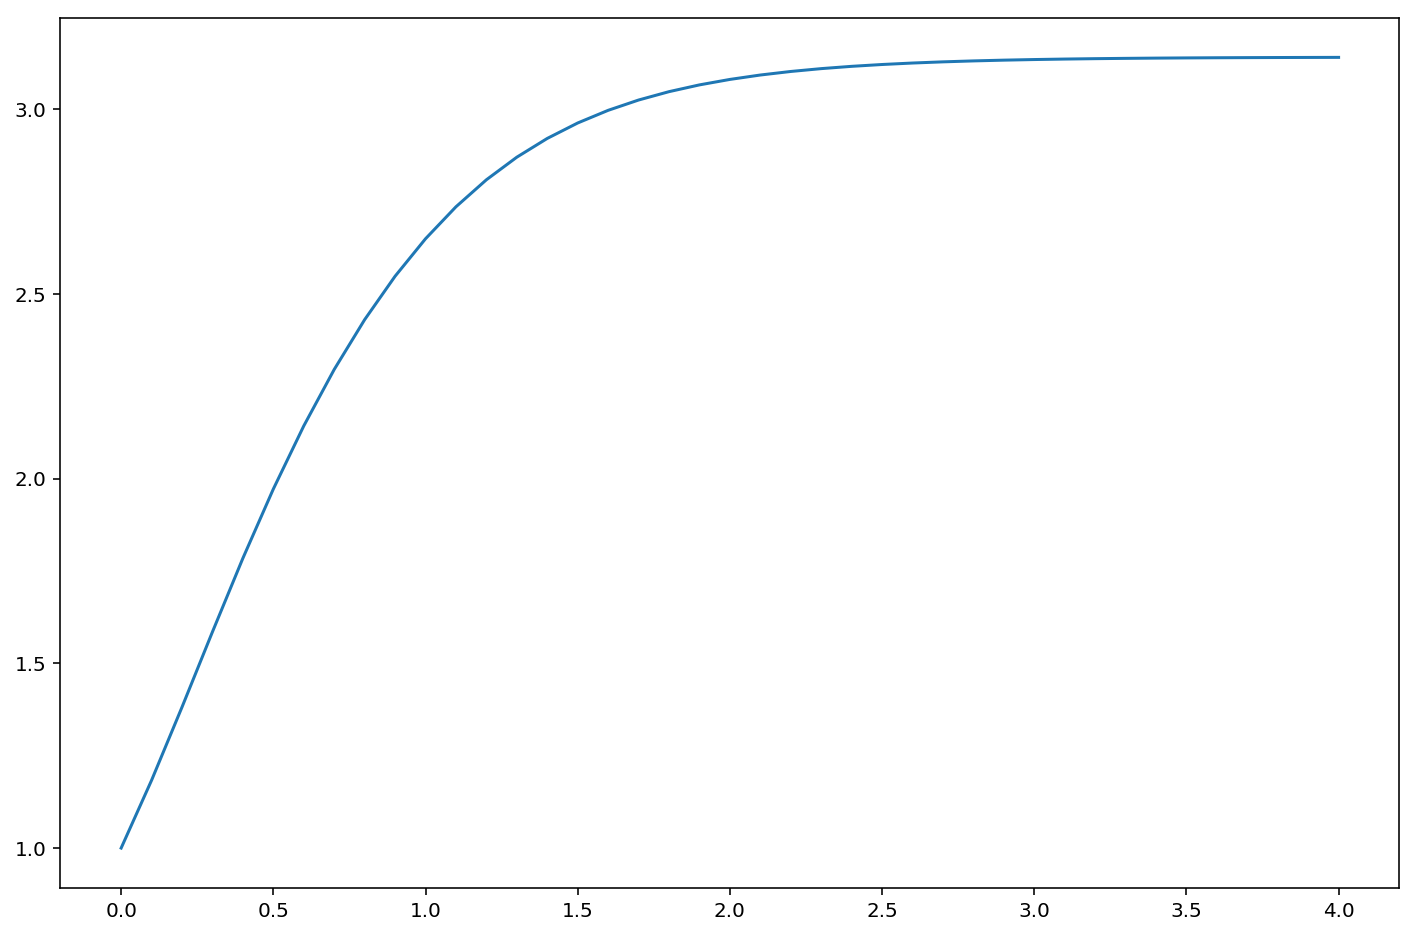

In [173]:
part2_problem2(0.1)